In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

B1 = 1st street bet, B2 = 2nd street (both as fraction of pot)

In [16]:
B1 = 1.
B2 = 1.

In [17]:
def gtostrat(B1, B2):
    A1 = (1+B1)/(1 + (1+B1) + (1+B2)**2*(1+2*(1+B1)**2))
    
    A2 = (1 + (1+B2)**2)/(1+B1)*A1
    A3 = 2*B1*(1+B2)**2*A1
    A4 = 2*B2*(1+B2)*A1
    A5 = (1+B2)*(1-B2)*A1
    A6 = B2*(1+B2)*A1
    A7 = (1+B2)*A1
    
    a2 = A1
    a1 = A1+A2
    c1 = A1+A2+A3
    c2 = A1+A2+A3+A4
    b1 = A1+A2+A3+A4+A5
    b2 = A1+A2+A3+A4+A5+A6
    
    return a1, a2, b1, b2, c1, c2

In [18]:
a1, a2, b1, b2, c1, c2 = gtostrat(B1, B2)
np.testing.assert_almost_equal(b1-c1, 1-b1, decimal=15)
np.testing.assert_almost_equal(b2-c2, 1-b2, decimal=15)
np.testing.assert_almost_equal(c1-a1, B1*(1-c1), decimal=15)
np.testing.assert_almost_equal(c2-c1, B2*(1-c2), decimal=15)
np.testing.assert_almost_equal(1-b1+a2, (1+B1)*(a1-a2), decimal=15)
np.testing.assert_almost_equal(1-b2, (1+B2)*a2, decimal=15)

In [19]:
def plot2streetvonNeumann(B1,B2):
    a1, a2, b1, b2, c1, c2 = gtostrat(B1, B2)

    height=1
    fig, ax = plt.subplots()

    bet = 'r'
    check = 'g'
    fold = 'b'
    call = 'g'
    
    p1y =  2

    ax.barh(p1y, a2, height=height, color=bet)
    ax.barh(p1y, a1-a2, height=height, left=a2, color=bet, alpha=0.5)
    ax.barh(p1y, b1-a1, height=height, left=a1, color=check)
    ax.barh(p1y, b2-b1, height=height, left=b1, color=bet, alpha=0.5)
    ax.barh(p1y, 1-b1, height=height, left=b2, color=bet)
    
    
    p2y =  0
    ax.barh(p2y, c1, height=height, color=fold)
    ax.barh(p2y, c2-c1, height=height, left=c1, color=call, alpha=0.5)
    ax.barh(p2y, 1-c2, height=height, left=c2, color=call)

    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)

    ax.set_ylim([-height,3*height])
    ax.set_xlim([0,1])

    ax.text(-0.2, p1y, 'P1', fontsize=20)
    ax.text(-0.2, p2y, 'P2', fontsize=20)
    ax.text(b-0.02, p1y+height*2/3, 'b', fontsize=20)
    ax.text(a-0.02, p1y+height*2/3, 'a', fontsize=20)
    ax.text(c-0.02, p2y+height*2/3, 'c', fontsize=20)
    ax.legend(loc=(1.1, 0.2))
    return fig

NameError: name 'b' is not defined

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


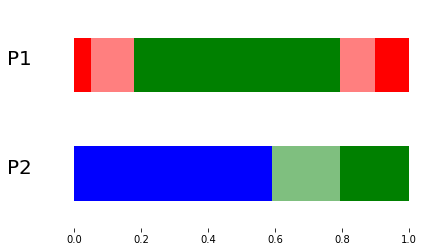

In [20]:
plot2streetvonNeumann(B1,B2)